In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Let Create a synthetic data points
from sklearn.datasets import make_classification


In [103]:
X,Y= make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [104]:
X

array([[ 0.83221961,  1.21673524],
       [ 0.50856484, -2.00448452],
       [-1.8921493 ,  0.75297341],
       ...,
       [ 0.25897757, -1.38485959],
       [-1.42898521,  0.12402785],
       [-1.49431861, -0.08933857]])

In [105]:
pd.DataFrame(X)[0]

0      0.832220
1      0.508565
2     -1.892149
3     -0.660795
4     -0.055466
         ...   
995   -1.383407
996   -1.560161
997    0.258978
998   -1.428985
999   -1.494319
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

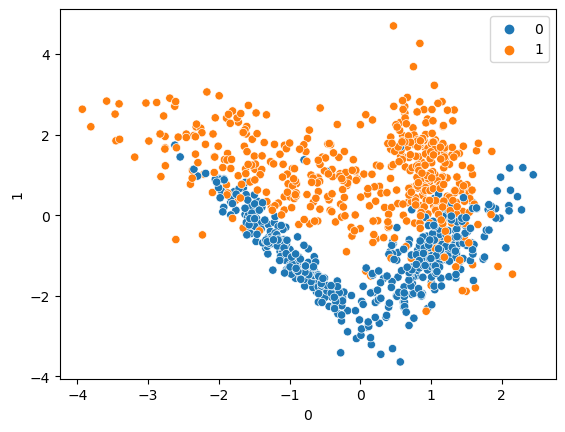

In [106]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=Y)

In [107]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=10)

In [108]:
from sklearn.svm import SVC

In [109]:
svc=SVC(kernel='linear')

In [110]:
svc.fit(Xtrain,Ytrain)

SVC(kernel='linear')

In [111]:
## Predicition
Ypred=svc.predict(Xtest)

In [112]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(Ytest,Ypred)
matrix=confusion_matrix(Ytest,Ypred)

In [113]:
print(report)
print(matrix)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       119
           1       0.85      0.88      0.86       131

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

[[ 98  21]
 [ 16 115]]


In [114]:
rbf=SVC(kernel='rbf')

In [115]:
rbf.fit(Xtrain,Ytrain)

SVC()

In [116]:
## Predicition
Ypred2=rbf.predict(Xtest)

In [117]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(Ytest,Ypred2)
matrix=confusion_matrix(Ytest,Ypred2)

In [118]:
print(report)
print(matrix)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       119
           1       0.93      0.87      0.90       131

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[110   9]
 [ 17 114]]


In [132]:
## Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

#defining parameter range 
paramGrid={'C': [0.1,1,10,100,1000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['linear','rbf']}

In [133]:
grid=GridSearchCV(SVC(),param_grid=paramGrid,refit=True,cv=5,verbose=3)

In [134]:
grid.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.847 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.867 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.787 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.840 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.847 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.787 total time=   0.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.840 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.847 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.867 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.787 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.840 total time=   0.0s
[CV 5/5] END ....C=10, gamma

[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.880 total time=   0.2s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.847 total time=   0.2s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.867 total time=   0.2s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.787 total time=   0.2s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.840 total time=   0.2s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.880 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=1000, ga

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [135]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [136]:
## Predicition
Ypred3=grid.predict(Xtest)

In [137]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(Ytest,Ypred3)
matrix=confusion_matrix(Ytest,Ypred3)

In [138]:
print(report)
print(matrix)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       119
           1       0.93      0.89      0.91       131

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[110   9]
 [ 14 117]]
